In [12]:
import pandas as pd
import pandas as pd
import numpy as np

#데이터 불러오기
df_2019 = pd.read_csv('./data/2019DATA_7장노년_KEY작업.csv', encoding='utf-8')
columns =pd.read_excel('./data/2019DATA_7고령층.xlsx',header=1)
df_2018 = pd.read_csv('./data/2018DATA_7장노년_KEY작업.csv',encoding='utf-8')
result = pd.read_csv('2018데이터_y값_열날림.csv',encoding = 'euc-kr')


In [75]:
df_2019.shape, df_2018.shape

((2300, 270), (2303, 233))

In [101]:
#y 값 정리 코드
df_2018 = df_2018.fillna(0)
        
lst = []
for i in range(189,210):
    for j in range(len(df_2018.iloc[:,i])):
        new_data = df_2018.iloc[j,:]
        if df_2018.iloc[j,i] != 0.0:
            new_data['y'] = df_2018.iloc[j,i]
            lst.append(new_data)
result = pd.DataFrame(lst)
result

<ipython-input-101-01748c1e2f3a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['y'] = df_2018.iloc[j,i]
C:\Users\wodud\anaconda3\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


,ID,문1) 현재 귀하가 이용할 수 있는 데스크탑 컴퓨터나 노트북이 귀댁에 있습니까? 1) 데스크탑 컴퓨터,문1) 현재 귀하가 이용할 수 있는 데스크탑 컴퓨터나 노트북이 귀댁에 있습니까? 2) 노트북,문2) (보기 카드 제시) 다음 제시한 기기별로 귀댁에서 귀하가 이용할 수 있는 기기의 보유여부를 응답해주세요 1) 휴대폰(모두 응답) 1,문2) (보기 카드 제시) 다음 제시한 기기별로 귀댁에서 귀하가 이용할 수 있는 기기의 보유여부를 응답해주세요 1) 휴대폰(모두 응답) 2,문2) (보기 카드 제시) 다음 제시한 기기별로 귀댁에서 귀하가 이용할 수 있는 기기의 보유여부를 응답해주세요 1) 휴대폰(모두 응답)_보유여부,"문2) (보기 카드 제시) 다음 제시한 기기별로 귀댁에서 귀하가 이용할 수 있는 기기의 보유여부를 응답해주세요 2) 스마트패드(태블릿 PC: 아이패드, 갤럭시탭(노트), LG G패드, 넥서스7 등)","문2) (보기 카드 제시) 다음 제시한 기기별로 귀댁에서 귀하가 이용할 수 있는 기기의 보유여부를 응답해주세요 3) 스마트 주변기기(스마트워치, 스마트헬스밴드 등)","문3) 현재 귀댁에서는 컴퓨터/노트북, 스마트폰/스마트패드, TV, 게임기 등을 통해 인터넷(무선인터넷 포함)을 이용 할 수 있습니까?",문4) 귀하는 컴퓨터(데스크탑/노트북)를 통해 다음의 활동을 스스로 얼마나 하실 수 있으신지요? 1) 나는 필요한 프로그램(소프트웨어)을 컴퓨터에 설치/삭제/업데이트 할 수 있다,...,[일반/장노년]가구 구성 형태 2인 이상 다인 가구 5,[일반/장노년]가구 구성 형태 2인 이상 다인 가구 6,[일반/장노년]가구 구성 형태 2인 이상 다인 가구 7,[일반/장노년]가구 구성 형태 2인 이상 다인 가구 8,[일반/장노년]가구 월평균 소득,[일반/장노년]현재 거주지역 (광역시도),[일반/장노년]지역구분1,[일반/장노년]지역구분2,Weight,y
0,10180,2,2,2,0.0,1,2,2,1,1,...,0.0,0.0,0.0,0.0,9,1,1,1,1.89,22.0
1,10311,2,2,2,0.0,1,2,2,2,1,...,0.0,0.0,0.0,0.0,4,1,1,1,1.89,3.0
2,10312,1,2,2,0.0,1,2,2,1,3,...,0.0,0.0,0.0,0.0,9,1,1,1,1.89,7.0
3,10313,1,2,1,0.0,1,2,2,1,3,...,0.0,0.0,0.0,0.0,9,1,1,1,1.89,12.0
4,10314,2,2,3,0.0,2,2,2,1,1,...,0.0,0.0,0.0,0.0,2,1,1,1,1.89,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572,11882,1,1,1,0.0,1,1,2,1,3,...,0.0,0.0,0.0,0.0,10,4,1,1,1.07,17.0
579,11890,1,2,1,0.0,1,2,2,1,4,...,0.0,0.0,0.0,0.0,11,4,1,1,1.07,17.0
598,11909,1,2,1,0.0,1,2,2,1,1,...,0.0,0.0,0.0,0.0,10,4,1,1,0.99,17.0
650,12084,1,1,1,0.0,1,1,2,1,3,...,0.0,0.0,0.0,0.0,7,4,1,1,0.92,17.0


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


22.0    1097
6.0      336
7.0      315
1.0      284
14.0     275
3.0      270
2.0      226
8.0      210
9.0      188
11.0     162
12.0     148
4.0      117
13.0     115
5.0      100
10.0      91
15.0      61
17.0      61
19.0      61
18.0      54
16.0      34
20.0      29
21.0       5
Name: y, dtype: int64


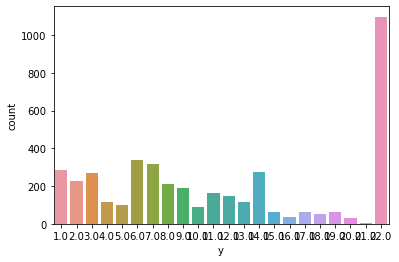

In [4]:
# y값 카운트
import seaborn as sns
sns.countplot(result['y'])
print(result['y'].value_counts())

In [5]:
result['y'].unique()

array([22.,  3.,  7., 12.,  4.,  8.,  1.,  9.,  2., 18.,  5., 19., 14.,
        6., 11., 16., 10., 15., 17., 13., 20., 21.])

In [55]:
result = pd.read_csv('2018데이터_y값_열날림.csv',encoding = 'euc-kr')

# y값 5개의 값으로 묶기
y_feature = {
    '컴퓨터 기초': [1.,2.,3.,4.,5.],
    '생활서비스':[7.,8.,9.,10.],
    '소셜미디어':[12.,13.],
    '미디어 창작/앱 개발':[14.,15.,16.,17.],
    '새로운 기기 기술 체험 및 활용':[18.,19.,20.]
            }
def chage_y(x):
    for key, value in y_feature.items():
        for title in value:
            if x == title:
                return key
    return 0
result['y'] = result['y'].apply(lambda x: chage_y(x))


#쓸모없는 열 행 날리기 

#행 날리기
result = result[result['y'] != 0]

#열 삭제 
result = result.drop(result.columns[0:2], axis =1 )
result = result.drop(['Weight'],axis=1)



# *표시 제거
def not_star(x):
    if x == "*":
        x = 0
    return x
result = result.applymap(not_star)


#중복행 삭제
print(result['y'].value_counts())
result = result.drop_duplicates()
result['y'].value_counts()

In [ ]:
result[['[일반/장노년]성별', '[일반/장노년]직업1', '[일반/장노년]현재 거주지역 (광역시도)']].dtypes

In [31]:
# 데이터 타입 변경 일단 3개 #라벨 인코딩
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
lbl =LabelEncoder()

result['[일반/장노년]성별'] = lbl.fit_transform(result['[일반/장노년]성별'].astype(str))
result['[일반/장노년]직업1'] = lbl.fit_transform(result['[일반/장노년]직업1'].astype(str))
result['[일반/장노년]현재 거주지역 (광역시도)'] = lbl.fit_transform(result['[일반/장노년]현재 거주지역 (광역시도)'].astype(str))

result[['[일반/장노년]성별', '[일반/장노년]직업1', '[일반/장노년]현재 거주지역 (광역시도)']].dtypes

[일반/장노년]성별                int32
[일반/장노년]직업1               int32
[일반/장노년]현재 거주지역 (광역시도)    int32
dtype: object

In [46]:
import re
regex = re.compile(r"\[|\]|<", re.IGNORECASE)
result.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in result.columns.values]

In [43]:
print(
    '연령별직업 :',result['[일반/장노년]직업1'].unique(),'\n',
    '직업1 :',result['[일반/장노년]직업1'].unique(),'\n',
    '직업2 :',result['[일반/장노년]직업1'].unique(),'\n',
    '최종학력 : ',result['[일반/장노년]직업1'].unique(),'\n',
    '장애구분 1',result['[일반/장노년]직업1'].unique(),'\n',
    '장애구분 2',result['[일반/장노년]직업1'].unique(),'\n',
    '가구 거주 형태',result['[일반/장노년]직업1'].unique(),'\n',
    '가구거주 구성형태',result['[일반/장노년]직업1'].unique(),'\n',
    '가구 구성형태 2인이상 :',result['[일반/장노년]직업1'].unique(),result['[일반/장노년]직업1'].unique(),result['[일반/장노년]직업1'].unique(),result['[일반/장노년]직업1'].unique(),result['[일반/장노년]직업1'].unique(),result['[일반/장노년]직업1'].unique(),result['[일반/장노년]직업1'].unique(),result['[일반/장노년]직업1'].unique(),'\n',
    '가구 월평균 소득 :',result['[일반/장노년]직업1'].unique(),'\n',
    '현재 거주지역:',result['[일반/장노년]직업1'].unique(),'\n',
    '지역구분1:',result['[일반/장노년]직업1'].unique(),'\n',
    '지역구분2:',result['[일반/장노년]직업1'].unique()
)

연령별직업 : ['5' '4' '3' '7' '1' '8' '9' '14' '11' 0 '6'] 
 직업1 : ['5' '4' '3' '7' '1' '8' '9' '14' '11' 0 '6'] 
 직업2 : ['5' '4' '3' '7' '1' '8' '9' '14' '11' 0 '6'] 
 최종학력 :  ['5' '4' '3' '7' '1' '8' '9' '14' '11' 0 '6'] 
 장애구분 1 ['5' '4' '3' '7' '1' '8' '9' '14' '11' 0 '6'] 
 장애구분 2 ['5' '4' '3' '7' '1' '8' '9' '14' '11' 0 '6'] 
 가구 거주 형태 ['5' '4' '3' '7' '1' '8' '9' '14' '11' 0 '6'] 
 가구거주 구성형태 ['5' '4' '3' '7' '1' '8' '9' '14' '11' 0 '6'] 
 가구 구성형태 2인이상 : ['5' '4' '3' '7' '1' '8' '9' '14' '11' 0 '6'] ['5' '4' '3' '7' '1' '8' '9' '14' '11' 0 '6'] ['5' '4' '3' '7' '1' '8' '9' '14' '11' 0 '6'] ['5' '4' '3' '7' '1' '8' '9' '14' '11' 0 '6'] ['5' '4' '3' '7' '1' '8' '9' '14' '11' 0 '6'] ['5' '4' '3' '7' '1' '8' '9' '14' '11' 0 '6'] ['5' '4' '3' '7' '1' '8' '9' '14' '11' 0 '6'] ['5' '4' '3' '7' '1' '8' '9' '14' '11' 0 '6'] 
 가구 월평균 소득 : ['5' '4' '3' '7' '1' '8' '9' '14' '11' 0 '6'] 
 현재 거주지역: ['5' '4' '3' '7' '1' '8' '9' '14' '11' 0 '6'] 
 지역구분1: ['5' '4' '3' '7' '1' '8' '9' '14' '11' 0 '6'] 

In [71]:
# 모델 분리
feature_columns = result.columns.difference(["y"]) # new_y를 제외한 모든 행
X = result[feature_columns]
y = result['y']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42,stratify = y)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(1507, 210) (377, 210) (1507,) (377,)


In [73]:
#랜덤 포레스트 모델
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

forest = RandomForestClassifier(n_estimators = 100 ,max_depth = 7, random_state = 42 ) # 시드값 고정
model1 = forest.fit(X_train, y_train) # 학습 진행

predict_train = model1.predict(X_train) # 평가 데이터 예측
print("Accuracy: %.2f" % (accuracy_score(y_train, predict_train) * 100), "%")

predict_test = model1.predict(X_test) # 평가 데이터 예측
print("Accuracy: %.2f" % (accuracy_score(y_test, predict_test) * 100), "%")



Accuracy: 59.32 %
Accuracy: 28.65 %


[('문10) (생활 서비스) 귀하께서는 최근 1년 동안 다음과 같은 서비스를 얼마나 이용하셨습니까? 모든 항목에 대해 응답해 주십시오. 모바일기기 기준 3) 금융거래(인터넷뱅킹, 계좌 확인/이체/송금,F1.2',
  0.022392345659095127),
 ('문7-1) (보기 카드 제시) 그럼, 귀하는 최근 한 달간 아래의 기기를 통해 인터넷을 며칠이나 이용하셨는지요? 1) PC(데스크탑, 노트북)',
  0.018121625251580228),
 ('문9) (사회관계 및 정보공유 서비스) 귀하께서는 최근 1년 동안 다음과 같은 서비스를 얼마나 이용하셨습니까? 모든 항목에 대해 응답해 주십시오. 모바일기기 기준 1) SNS',
  0.01750314061368488),
 ('문19) (인터넷 이용자(문7의 ①응답자) 대상) 다음의 귀하의 새로운 기술을 접할 때 자신감, 태도 등에 관한 항목들입니다. 귀하께서는 어디에 해당되는지 응답해 주십시오. 3) 새로운 기술 및 제？F1.2',
  0.014471411901862307),
 ('[일반/장노년]가구 월평균 소득', 0.014046368003736136),
 ('문8) (검색 및 이메일, 콘텐츠 서비스) 귀하께서는 최근 1년 동안 다음과 같은 서비스를 얼마나 이용하셨습니까? 모든 항목에 대해 응답해 주십시오.모바일기기 기준  1) 정보 및 뉴스 검색',
  0.013533847723782928),
 ('[일반/장노년]연령', 0.013232814287990644),
 ('문4) 귀하는 컴퓨터(데스크탑/노트북)를 통해 다음의 활동을 스스로 얼마나 하실 수 있으신지요? 5) 나는 컴퓨터에 있는 파일을 인터넷을 통해 다른 사람에게 전송할 수 있다',
  0.013077218720861365),
 ('문20) (인터넷 이용자(문7의 ①응답자) 대상) 디지털기기(PC 또는 스마트폰 등) 이용 실제 성과에 관한 질문입니다.아래의 항목들에 대해 귀하께서는 어디에 해당되는지 응답해 주십시오. 3) 더 많？F1.2',
 

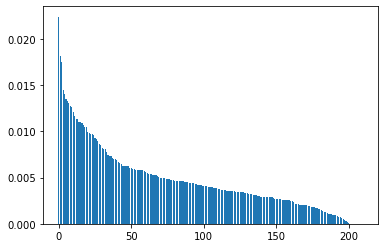

In [44]:
# 학습한 모델의 피쳐 중요도 그래프로 살펴봅니다
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
plt.bar(range(X.shape[1]), importances[indices])

#학습한 모델의 피쳐 중요도 출력합니다
feat_labels =X.columns.tolist()
feature = list(zip(feat_labels, forest.feature_importances_))
#forest.feature_importances_로 순서를 맞춰 보여줘라
sorted(feature, key = lambda tup: tup[1], reverse = True)[:10]

In [75]:
#XGboost
import xgboost
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

xgb = XGBClassifier(random_state = 0, n_estimator = 20, max_depth = 5, subsample = 0.8,gamma = 0.1).fit(X_train, y_train)

predict_train = xgb.predict(X_train) # 평가 데이터 예측
print("Accuracy: %.2f" % (accuracy_score(y_train, predict_train) * 100), "%")

predict_test = xgb.predict(X_test) # 평가 데이터 예측
print("Accuracy: %.2f" % (accuracy_score(y_test, predict_test) * 100), "%")


C:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:16:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimator" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:16:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 67.55 %
Accuracy: 24.14 %


In [76]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(xgb, random_state =1).fit(X_test,y_test)
eli5.show_weights(perm,feature_names = X_test.columns.tolist())

Weight,Feature
0.0138 ± 0.0140,문12) (네트워킹 정도) 최근 1년간 디지털기기(PC 또는 스마트폰 등)를 통해 다음과 같은 활동을 얼마나 하셨는지요? 모바일기기 기준 1) 나는 기존에 알던 사람들과 관계를 유지하고 더 친밀해지？F1.2
0.0117 ± 0.0042,문5) 귀하는 모바일기기(스마트폰 및 스마트패드 등)를 통해 다음의 활동을 스스로 얼마나 하실 수 있습니까? 5) 나는 필요한 앱을 모바일기기에 설치/삭제/업데이트할 수 있다
0.0117 ± 0.0072,_일반/장노년_가구 월평균 소득
0.0106 ± 0.0095,"문23-2) 다음의 나열한 지능정보기술들에 대하여 아는 정도와 실제 사용 또는 경험해 본적이 있는지, 아래의 기술들이 내 삶에 얼마나 필요하다고 생각하시는가요? ③ 필요도 5) 스마트홈"
0.0106 ± 0.0095,_일반/장노년_연령
0.0090 ± 0.0119,"문21) (중학생 이상, 모든 응답자 대상) 다음은 일상생활 부문별 만족도에 대한 질문입니다. 스마트폰 이용여부와 관계없이 귀하께서는 일상생활에서 아래의 항목들에 대해 얼마나 만족하십니까F1.2_3"
0.0085 ± 0.0021,문20) (인터넷 이용자(문7의 ①응답자) 대상) 디지털기기(PC 또는 스마트폰 등) 이용 실제 성과에 관한 질문입니다.아래의 항목들에 대해 귀하께서는 어디에 해당되는지 응답해 주십시오. 1) 여가(？F1.2
0.0080 ± 0.0089,"문23-2) 다음의 나열한 지능정보기술들에 대하여 아는 정도와 실제 사용 또는 경험해 본적이 있는지, 아래의 기술들이 내 삶에 얼마나 필요하다고 생각하시는가요? ③ 필요도 7) 생체인증"
0.0074 ± 0.0040,_일반/장노년_직업2
0.0074 ± 0.0123,문20) (인터넷 이용자(문7의 ①응답자) 대상) 디지털기기(PC 또는 스마트폰 등) 이용 실제 성과에 관한 질문입니다.아래의 항목들에 대해 귀하께서는 어디에 해당되는지 응답해 주십시오. 3) 더 많？F1.2
